# Laporan Proyek Sains Data
- Izazava Putri Asari - 24060122120038
- Miriam Stefani Abigail Hutapea - 24060122130051
- Helga Nurul Bhaiti - 24060122130063
- Pujiani Rahayu Agustin - 24060122130067
- Alya Safina - 24060122140123

# **1. Perkenalan Dataset**


Dataset dapat diperoleh dari \
https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators \
\
Dataset "CDC Diabetes Health Indicators" dari UCI Machine Learning Repository berisi data yang terkait dengan indikator kesehatan diabetes yang dikumpulkan oleh Centers for Disease Control and Prevention (CDC). Dataset ini memberikan informasi tentang berbagai metrik kesehatan dan faktor demografis yang digunakan untuk memprediksi kemungkinan seseorang menderita diabetes.


# **2. Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
sns.set_style("whitegrid")
import nbformat
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

# **3. Load Dataset**

In [3]:
# # Fetch dataset dari Repository UCI
# cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
# df = cdc_diabetes_health_indicators.data.original 

# # Masukkan dataset ke dalam .csv
# df.to_csv("dataset_clustering.csv", index=False)  
df = pd.read_csv("dataset_clustering.csv")

# Tampilkan informasi dataset untuk menguji apakah load dataset berhasil
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset shape: (253680, 23)
Columns: ['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


# **4. Exploratory Data Analysis (EDA)**

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Data Wrangling

In [4]:
# Tampilkan 5 baris pertama dari dataset
df.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,...,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,...,1,0,2,3,0,0,0,11,5,4


### Assessing Data

In [5]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   ID                    253680 non-null  int64
 1   Diabetes_binary       253680 non-null  int64
 2   HighBP                253680 non-null  int64
 3   HighChol              253680 non-null  int64
 4   CholCheck             253680 non-null  int64
 5   BMI                   253680 non-null  int64
 6   Smoker                253680 non-null  int64
 7   Stroke                253680 non-null  int64
 8   HeartDiseaseorAttack  253680 non-null  int64
 9   PhysActivity          253680 non-null  int64
 10  Fruits                253680 non-null  int64
 11  Veggies               253680 non-null  int64
 12  HvyAlcoholConsump     253680 non-null  int64
 13  AnyHealthcare         253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  GenHlth               253680 non-n

Pada informasi dataset, diketahui bahwa tipe data seluruh fitur merupakan integer. Namun, pada deskripsi dataset yang ada pada archive.ics.uci.edu/dataset/891, diketahui bahwa bilangan bulat tersebut dapat juga merepresentasikan biner (ya/tidak). Berikut adalah penjelasannya

| Nama Fitur                | Deskripsi                                                      | Jenis Fitur   | Satuan                           |
|---------------------------|----------------------------------------------------------------|---------------|----------------------------------|
| **BMI**                   | Body Mass Index                                                | Numerik       | Integer                         |
| **GenHlth**               | General Health (1-5 scale)                                     | Numerik       | Skala 1-5 (1 = excellent, 5 = poor) |
| **MentHlth**              | Mental Health (1-30 days)                                      | Numerik       | Skala 1-30 hari                  |
| **PhysHlth**              | Physical Health (1-30 days)                                    | Numerik       | Skala 1-30 hari                  |
| **Age**                   | Age (13-level age categories)                                  | Numerik       | Kategori usia (1 = 18-24, 9 = 60-64, 13 = 80 atau lebih) |
| **Education**             | Education Level (1-6 scale)                                    | Numerik       | Skala 1-6 (1 = Tidak pernah sekolah, 6 = Lulusan perguruan tinggi) |
| **Income**                | Income (1-8 scale)                                             | Numerik       | Skala 1-8 (1 = < $10,000, 8 = >= $75,000) |
| **ID**                    | Patient ID (Untuk identifikasi)                                | Kategorikal   | Integer                         |
| **Diabetes_binary**       | Prediabetes atau diabetes (0 = no, 1 = prediabetes/diabetes)  | Kategorikal   | 0 = no, 1 = prediabetes/diabetes |
| **HighBP**                | High Blood Pressure (0 = no, 1 = high BP)                     | Kategorikal   | 0 = no, 1 = high BP             |
| **HighChol**              | High Cholesterol (0 = no, 1 = high cholesterol)                | Kategorikal   | 0 = no, 1 = high cholesterol    |
| **CholCheck**             | Cholesterol check in 5 years (0 = no, 1 = yes)                 | Kategorikal   | 0 = no, 1 = yes                 |
| **Smoker**                | Smoking status (0 = no, 1 = yes)                               | Kategorikal   | 0 = no, 1 = yes                 |
| **Stroke**                | Ever had a stroke (0 = no, 1 = yes)                            | Kategorikal   | 0 = no, 1 = yes                 |
| **HeartDiseaseorAttack**  | Heart disease or heart attack (0 = no, 1 = yes)                | Kategorikal   | 0 = no, 1 = yes                 |
| **PhysActivity**          | Physical activity in the past 30 days (0 = no, 1 = yes)        | Kategorikal   | 0 = no, 1 = yes                 |
| **Fruits**                | Consume fruits daily (0 = no, 1 = yes)                         | Kategorikal   | 0 = no, 1 = yes                 |
| **Veggies**               | Consume vegetables daily (0 = no, 1 = yes)                     | Kategorikal   | 0 = no, 1 = yes                 |
| **HvyAlcoholConsump**     | Heavy alcohol consumption (0 = no, 1 = yes)                    | Kategorikal   | 0 = no, 1 = yes                 |
| **AnyHealthcare**         | Health care coverage (0 = no, 1 = yes)                         | Kategorikal   | 0 = no, 1 = yes                 |
| **NoDocbcCost**           | Couldn't see a doctor due to cost (0 = no, 1 = yes)            | Kategorikal   | 0 = no, 1 = yes                 |
| **DiffWalk**              | Difficulty walking or climbing stairs (0 = no, 1 = yes)        | Kategorikal   | 0 = no, 1 = yes                 |
| **Sex**                   | Gender (0 = female, 1 = male)                                  | Kategorikal   | 0 = female, 1 = male            |


Selanjutnya, karena ID tidak digunakan dalam proses clustering, maka sebaiknya kolom ini di-drop.

In [6]:
# Menghapus kolom ID
df = df.drop('ID', axis=1)

In [7]:
# Menampilkan missing values
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Melalui perintah di atas, diketahui bahwa tidak ada missing value pada dataset, sehingga tidak diperlukan penanganan khusus terhadap missing value.

In [8]:
# Menampilkan nilai duplikat
df.duplicated().sum()

np.int64(24206)

Melalui perintah di atas, diketahui bahwa ada nilai duplikat pada dataset. Namun, karena ada kolom kategorikal biner, hal ini sangat memungkinkan terjadi, sehingga tidak perlu diberikan perlakuan khusus pada nilai yang duplikat.

In [ ]:
# Menampilkan statistik deskriptif
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# **5. Data Preprocessing**

### Menghapus atau Menangani Data Kosong (Missing Values)
    - Karena tidak ada nilai yang kosong, maka tahapan ini tidak perlu dilakukan.

### Menghapus Data Duplikat
    - Karena tidak ada nilai yang duplikat, maka tahapan ini tidak perlu dilakukan.

### Normalisasi atau Standarisasi Fitur

In [9]:
# Pilih fitur untuk clustering
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']  # Simpan variabel target untuk validasi

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Data setelah standarisasi:")
print(X_scaled_df.describe().round(2).T[['mean', 'std', 'min', 'max']])

Data setelah standarisasi:
                      mean  std   min    max
HighBP                -0.0  1.0 -0.87   1.15
HighChol               0.0  1.0 -0.86   1.17
CholCheck              0.0  1.0 -5.08   0.20
BMI                   -0.0  1.0 -2.48  10.53
Smoker                 0.0  1.0 -0.89   1.12
Stroke                -0.0  1.0 -0.21   4.86
HeartDiseaseorAttack   0.0  1.0 -0.32   3.10
PhysActivity           0.0  1.0 -1.76   0.57
Fruits                 0.0  1.0 -1.32   0.76
Veggies               -0.0  1.0 -2.07   0.48
HvyAlcoholConsump      0.0  1.0 -0.24   4.10
AnyHealthcare          0.0  1.0 -4.41   0.23
NoDocbcCost           -0.0  1.0 -0.30   3.30
GenHlth                0.0  1.0 -1.41   2.33
MentHlth               0.0  1.0 -0.43   3.62
PhysHlth               0.0  1.0 -0.49   2.95
DiffWalk               0.0  1.0 -0.45   2.22
Sex                    0.0  1.0 -0.89   1.13
Age                    0.0  1.0 -2.30   1.63
Education             -0.0  1.0 -4.11   0.96
Income                 0.0  

### Binning (Pengelompokan Data)

In [10]:
# Binning untuk variabel BMI menjadi kategori sesuai standar kesehatan
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Menerapkan binning ke variabel BMI
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# Mengubah kategori usia menjadi kelompok yang lebih bermakna
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
    11: '70-74', 12: '75-79', 13: '80+'
}
df['Age_Group'] = df['Age'].map(age_mapping)

 Pengelompokan BMI dan usia ke dalam kategori yang lebih bermakna akan membantu untuk interpretasi hasil nantinya. Penggunaan kategori BMI sesuai standar kesehatan (Underweight, Normal, 
 Overweight, Obese) dapat mempermudah pemaknaan data sesuai dengan konteks klinis.

### Encoding Data Kategorikal
Karena kita menggunakan K-means yang berbasis jarak antar-kluster, maka tidak diperlukan Encoding karena beresiko menambah jarak antar cluster.

### Deteksi dan Penanganan Outlier

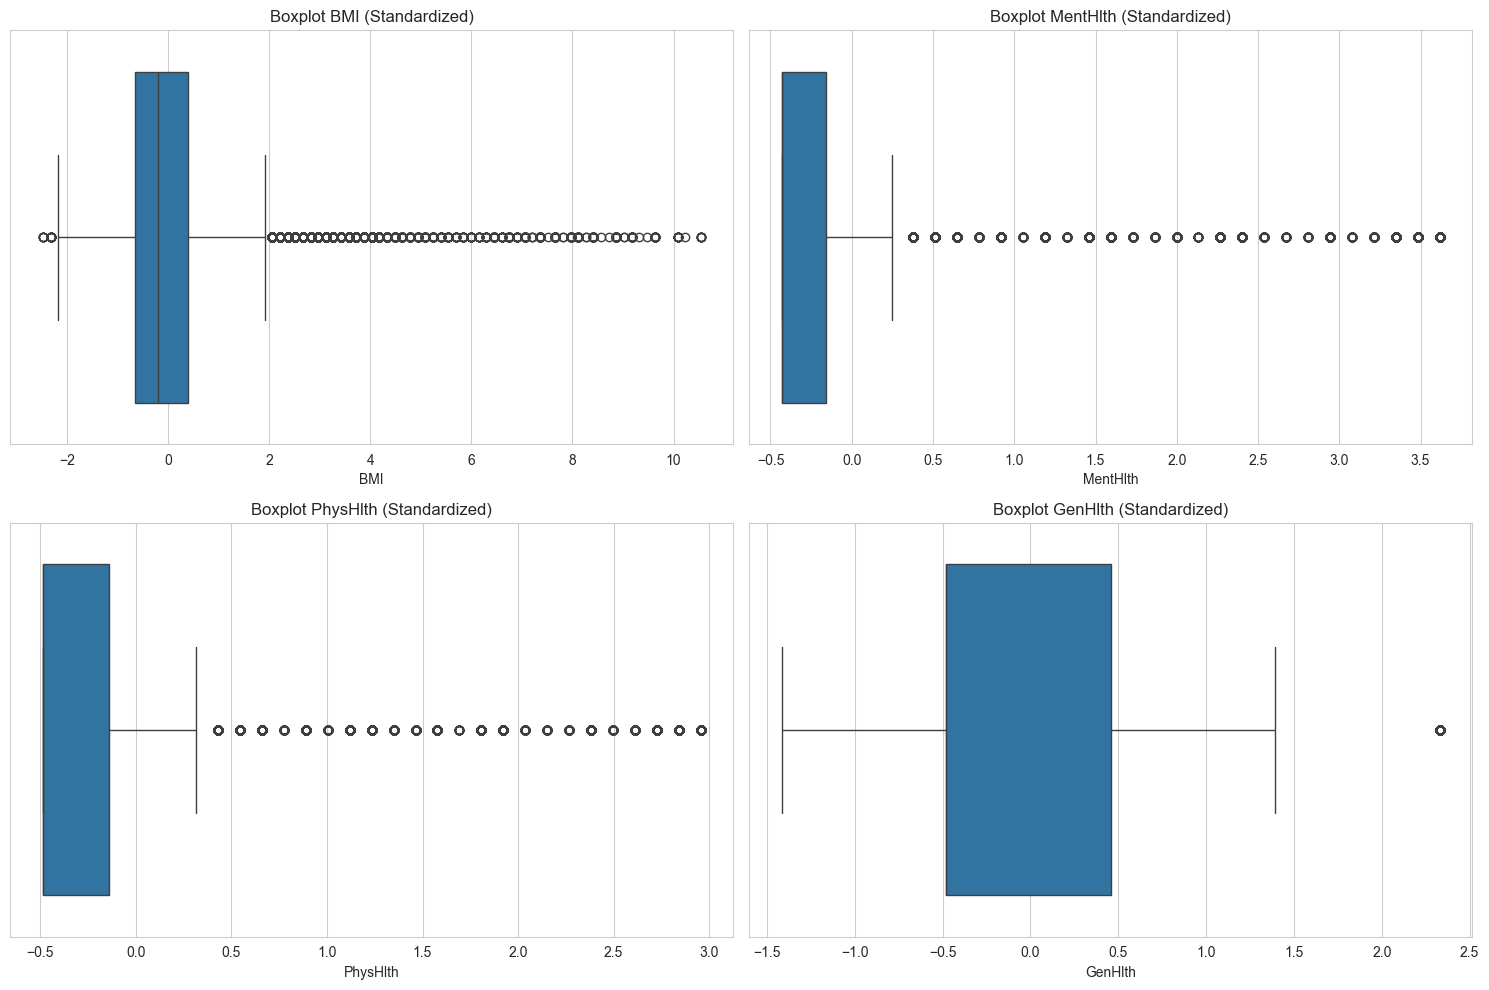

In [11]:
# Tentukan variabel numerik kontinu
numeric_continuous = ['BMI', 'MentHlth', 'PhysHlth', 'GenHlth']  

# Visualisasi outlier menggunakan boxplot untuk variabel numerik kontinu
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_continuous):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=X_scaled_df[feature])
    plt.title(f'Boxplot {feature} (Standardized)')
plt.tight_layout()
plt.show()

Berdasarkan boxplot untuk variabel yang telah distandarisasi, diketahui outlier sebagai berikut:
 
 1. **BMI:**
    - Terdapat beberapa outlier di bagian atas distribusi, yang mewakili individu dengan BMI sangat tinggi.
    - Outlier ini mungkin mewakili kasus obesitas berat yang relevan dengan analisis diabetes, sehingga tidak sebaiknya dihapus.
 
 2. **MentHlth & PhysHlth:**
    - Terdapat banyak outlier di bagian atas distribusi, yang mewakili individu yang melaporkan banyak hari dengan masalah kesehatan, sehingga tidak sebaiknya dihapus.
 
Melalui pertimbangan di atas, maka outlier tersebut tidak sebaiknya dihapus.

 Setelah standarisasi, semua fitur sekarang memiliki mean mendekati 0 dan standard deviation mendekati 1. Standarisasii penting untuk algoritma clustering seperti K-Means yang menggunakan jarak Euclidean dalam perhitungannya. Tanpa standarisasi, fitur dengan skala yang lebih besar (seperti BMI) akan mendominasi perhitungan jarak dibandingkan fitur binary yang hanya memiliki nilai 0 dan 1.
 
 Standarisasi memastikan bahwa:
 - Semua fitur berkontribusi secara setara dalam algoritma clustering
 - Metrik jarak tidak bias terhadap variabel dengan nilai absolut yang lebih besar
 - Model lebih stabil dan hasilnya lebih dapat diinterpretasi

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, akan dilakukan pembangunan model

Jumlah cluster optimal berdasarkan Elbow Method: 3


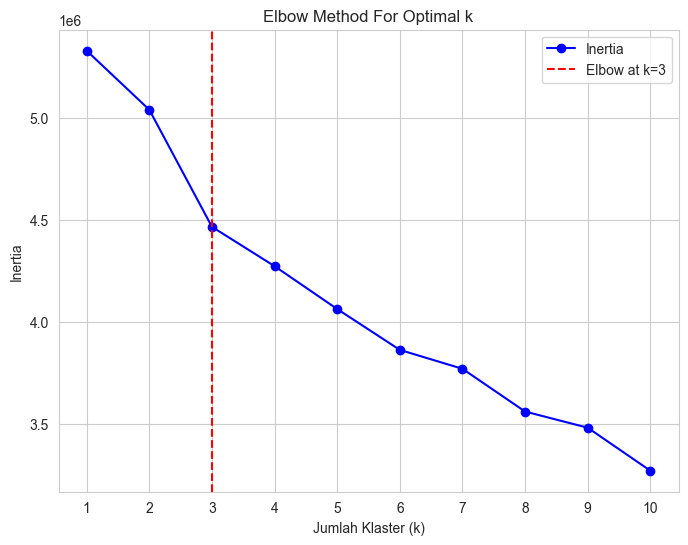

In [12]:
# Pada pemrosesan ini, akan digunakan X_scaled yang berisi dataframe yang telah dinormalisasi

# Menentukan jumlah klaster yang berbeda
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Menggunakan Kneedle untuk menemukan elbow
kneedle = KneeLocator(k_range, inertia, curve="convex", direction="decreasing")
elbow_point = kneedle.elbow
print(f"Jumlah cluster optimal berdasarkan Elbow Method: {elbow_point}")

# Visualisasikan elbow method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b', label='Inertia')
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow at k={elbow_point}')  # Garis menunjukkan elbow
plt.title('Elbow Method For Optimal k')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()


Melalui Elbow Method di atas, diketahui bahwa jumlah klaster yang paling optimal adalah 3.

Elbow Method mencari titik di mana penurunan inertia mulai melambat. Penurunan inertia tajam dari k=1 sampai k=3 dan setelah k=3, grafik penurunan mulai melandai, sehingga jumlah cluster optimal berdasarkan Elbow Method adalah 3

In [13]:
# Menentukan jumlah cluster final berdasarkan Elbow Method dan Silhouette Score
optimal_k = elbow_point  # Gunakan hasil elbow_point
print(f"Menggunakan jumlah cluster optimal: {optimal_k}")

# Membangun model final KMeans dengan jumlah cluster optimal
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(X_scaled)

# Menambahkan hasil klaster ke dalam dataset
df['Cluster'] = final_kmeans.labels_

Menggunakan jumlah cluster optimal: 3


Model final dibangun menggunakan jumlah cluster optimal yang ditentukan oleh Elbow Method dan divalidasi dengan Silhouette Score. Selanjutnya, hasil clustering (label) ditambahkan ke dataset asli sebagai kolom 'Cluster', yang memungkinkan analisis lebih lanjut tentang karakteristik tiap cluster.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

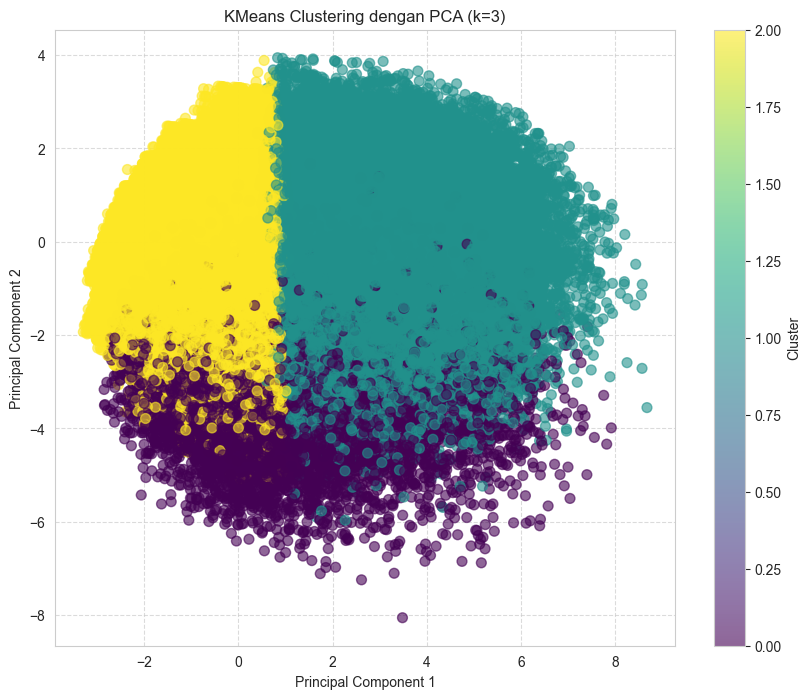

In [15]:
# Terapkan PCA untuk mereduksi dimensi data ke 2 komponen utama untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi 2D hasil clustering
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], 
                     cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.title(f'KMeans Clustering dengan PCA (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

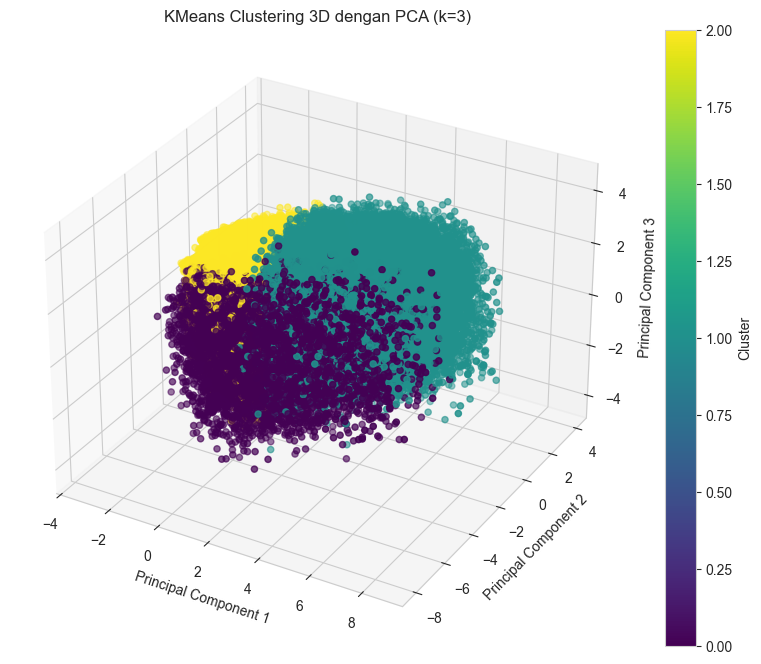

In [16]:
# Visualisasi 3D hasil clustering jika diinginkan
# Terapkan PCA untuk mereduksi dimensi data ke 3 komponen utama
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Visualisasi 3D hasil klastering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ambil komponen PCA untuk sumbu X, Y, Z
x = X_pca_3d[:, 0]  # Komponen 1
y = X_pca_3d[:, 1]  # Komponen 2
z = X_pca_3d[:, 2]  # Komponen 3

# Plot titik berdasarkan klaster yang dihasilkan
scatter = ax.scatter(x, y, z, c=df['Cluster'], cmap='viridis')

# Labeling
ax.set_title(f'KMeans Clustering 3D dengan PCA (k={optimal_k})')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Tambahkan colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')

plt.show()

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

#### Menampilkan distribusi fitur numerik dengan boxplot

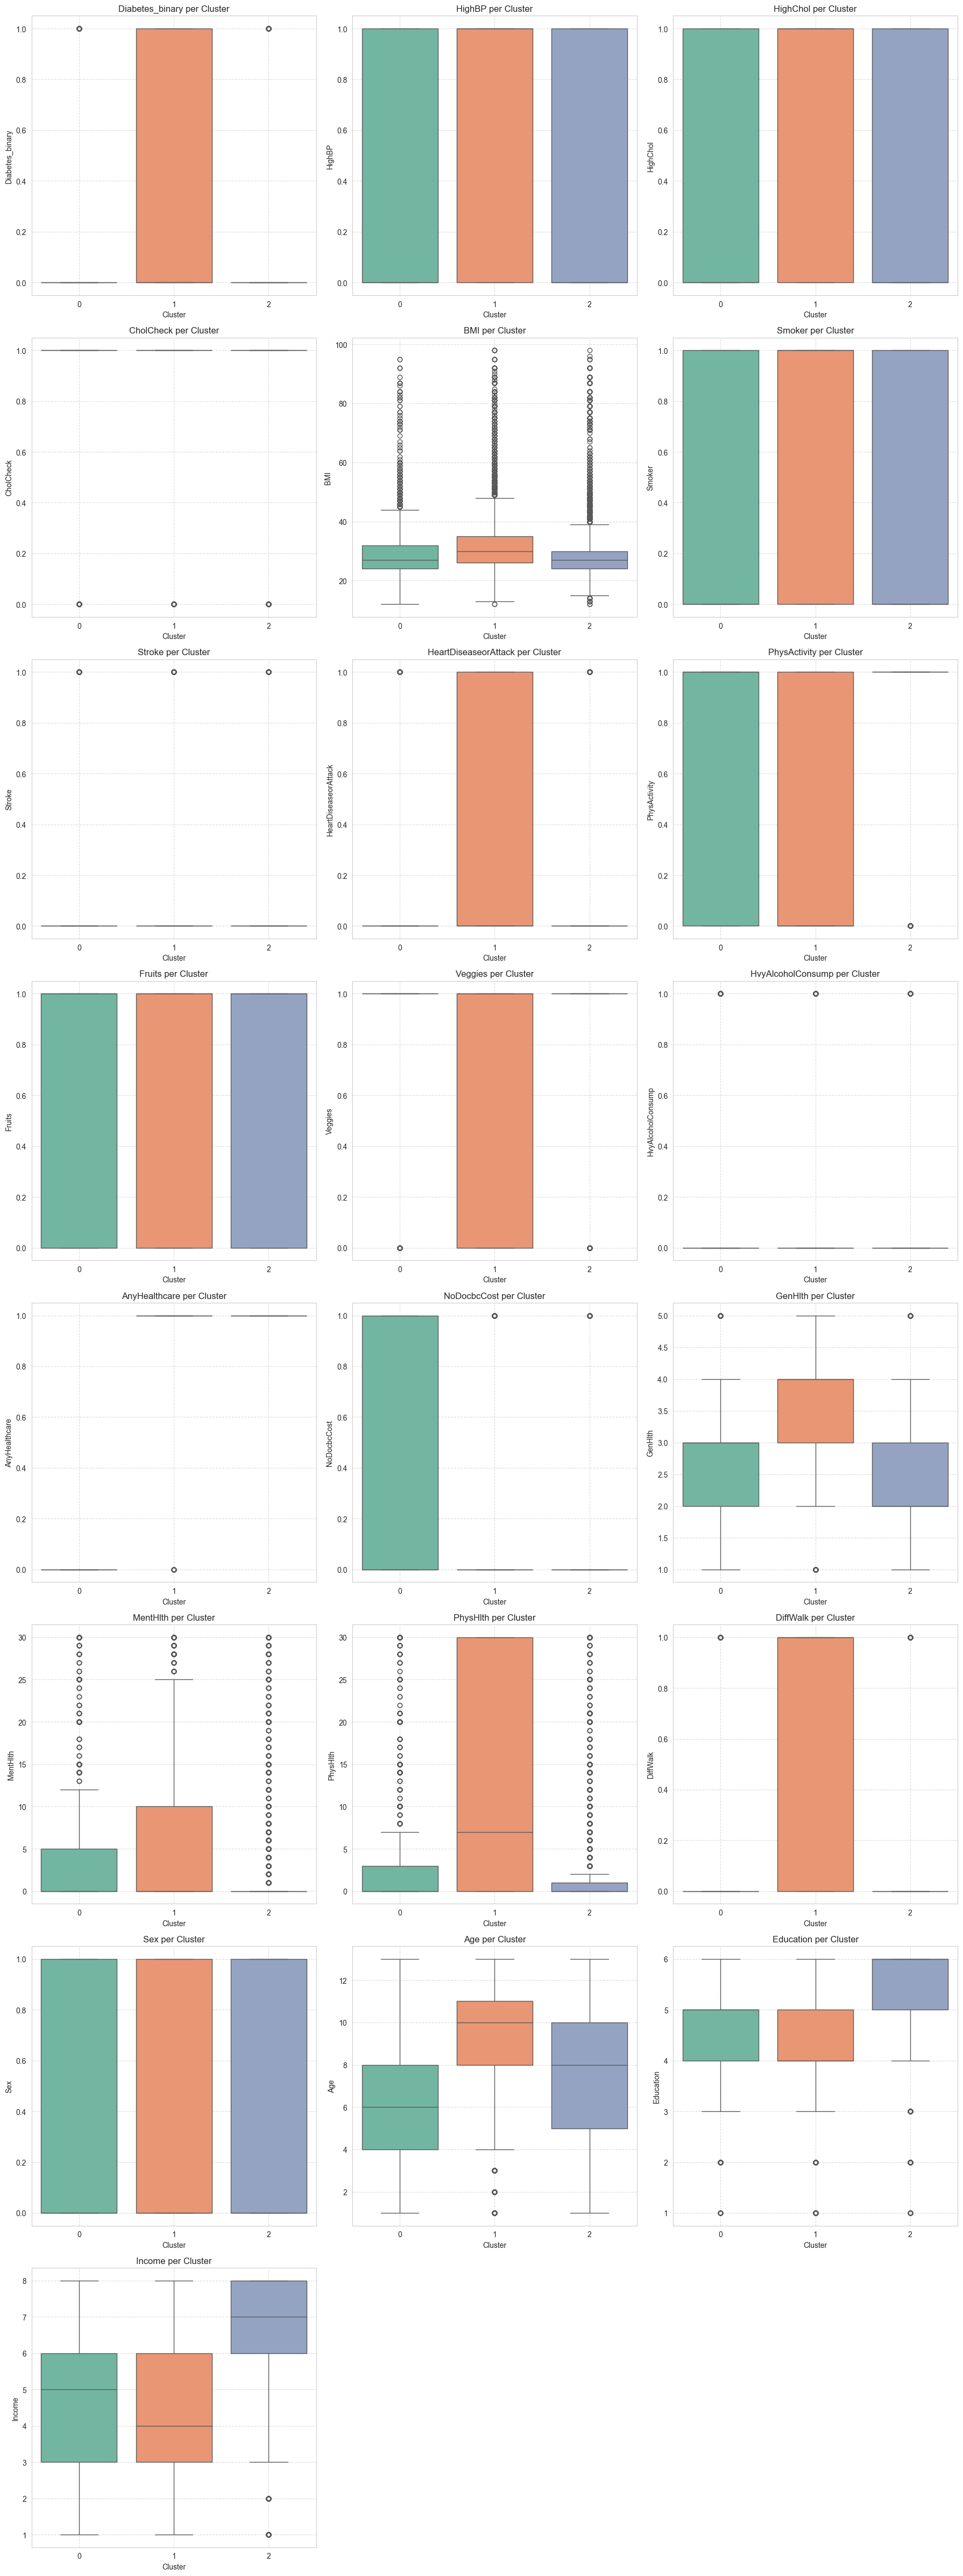

In [ ]:
# Seleksi fitur numerik asli 
df_numerik = df.select_dtypes(include=['float64', 'int64']).drop('Cluster', axis=1, errors='ignore')

# Menentukan jumlah subplot berdasarkan jumlah fitur numerik
n_features = df_numerik.shape[1]
n_rows = (n_features // 3) + (1 if n_features % 3 > 0 else 0)  # Mengatur jumlah baris subplot

# Membuat subplot untuk boxplot setiap fitur
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))

# Merapikan agar setiap fitur tampil dalam boxplot-nya
axes = axes.flatten()

# Loop untuk setiap fitur numerik dan membuat boxplot untuk masing-masing klaster
for i, feature in enumerate(df_numerik.columns):
    if i < len(axes):  # Pastikan tidak melebihi jumlah subplot yang tersedia
        sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{feature} per Cluster')
        axes[i].grid(True, linestyle='--', alpha=0.7)
    
# Menyembunyikan subplot kosong yang tersisa
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

# Menyesuaikan layout agar tidak ada yang tertimpa
plt.tight_layout()
plt.show()

#### Menghitung statistik deskriptif untuk setiap cluster 

Karakteristik rata-rata untuk setiap cluster:


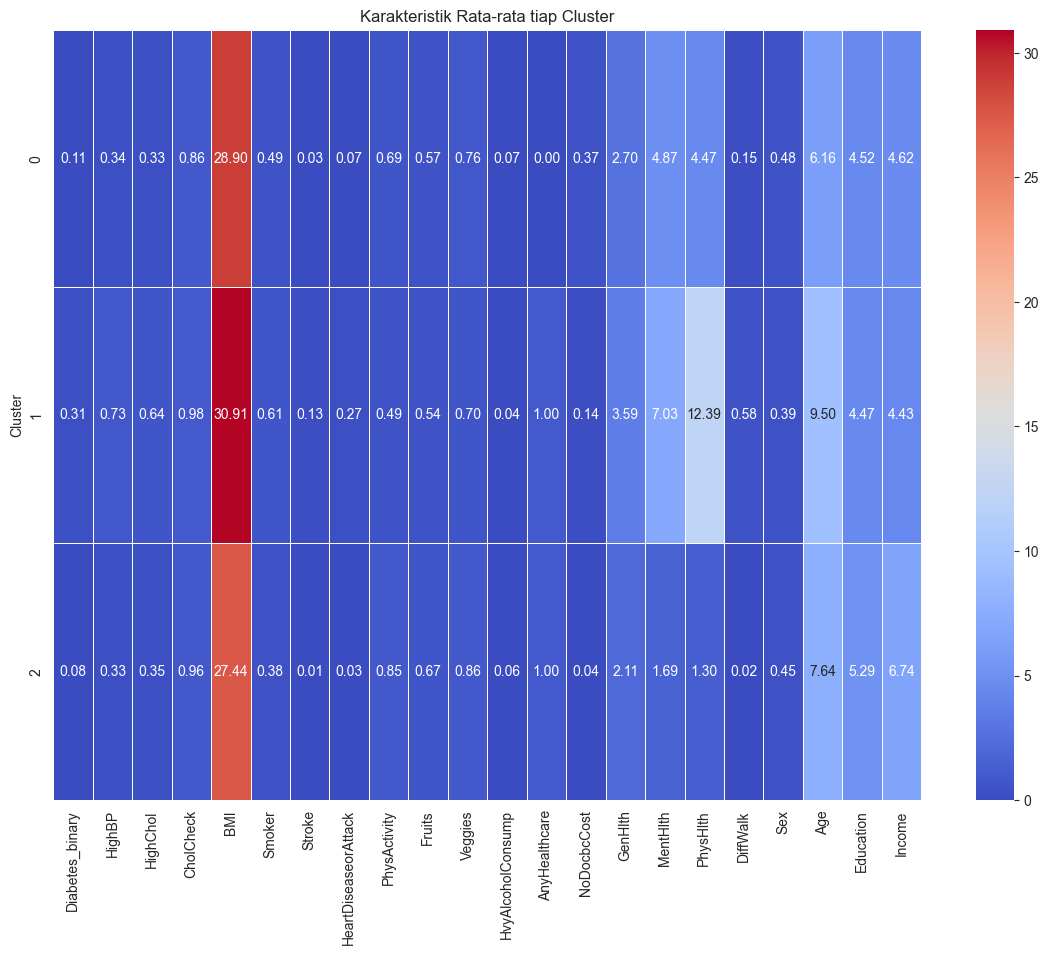

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
cluster_stats = df.groupby('Cluster')[numeric_columns].mean()
print("Karakteristik rata-rata untuk setiap cluster:")

# Visualisasi heatmap karakteristik cluster
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_stats, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Karakteristik Rata-rata tiap Cluster')
plt.show()

#### Distribusi status diabetes per cluster

<Figure size 1200x600 with 0 Axes>

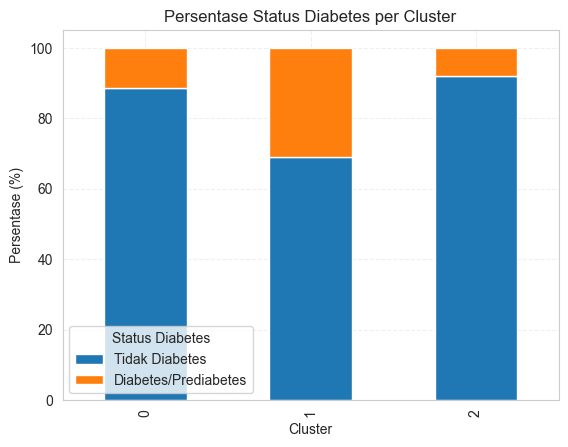

In [ ]:
plt.figure(figsize=(12, 6))
diabetes_by_cluster = pd.crosstab(df['Cluster'], df['Diabetes_binary'], normalize='index') * 100
diabetes_by_cluster.plot(kind='bar', stacked=True)
plt.title('Persentase Status Diabetes per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Persentase (%)')
plt.legend(title='Status Diabetes', labels=['Tidak Diabetes', 'Diabetes/Prediabetes'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Melalui hasil clustering, didapati:
 
 1. **Kelompok Risiko Menengah (Cluster 0)**: Cluster ini berada di antara risiko tinggi dan rendah. Individu dalam kelompok ini memiliki beberapa faktor risiko seperti BMI sedang dan kesehatan fisik/mental yang bervariasi, tetapi tidak seberat Cluster 1. Kelompok ini tetap membutuhkan pemantauan dan edukasi kesehatan agar tidak berpindah ke kategori risiko tinggi.

 2. **Kelompok Risiko Tinggi (Cluster 1)**: Individu dalam kelompok ini memiliki proporsi diabetes atau prediabetes tertinggi. Mereka umumnya memiliki BMI tinggi, tekanan darah dan kolesterol tinggi, serta komorbiditas lainnya yang meningkatkan risiko diabetes secara signifikan. Kelompok ini membutuhkan intervensi medis dan gaya hidup yang intensif untuk mencegah komplikasi lebih lanjut.
 
 3. **Kelompok Risiko Rendah (Cluster 2)**: Individu pada kelompok ini menunjukkan proporsi diabetes atau prediabetes paling rendah. Mereka cenderung memiliki BMI lebih ideal, gaya hidup sehat, serta kesehatan fisik dan mental yang baik. Kelompok ini juga didominasi oleh individu dengan pendidikan dan pendapatan lebih tinggi, yang turut berkontribusi pada perilaku hidup sehat. Kelompok ini bisa dijadikan benchmark dalam promosi kesehatan.
 
Melalui clustering ini didapat 3 kelompok: kelompok dengan risiko rendah diabetes, kelompok dengan risiko tinggi diabetes, dan kelompok dengan risiko menengah diabetes. Melalui data ini, kita dapat melakukan langkah preventif untuk mencegah diabetes, misalnya melalui pengembangan program kesehatan yang lebih terarah dan strategi pencegahan diabetes yang disesuaikan dengan karakteristik masing-masing kelompok risiko. 

# **7. Evaluasi**

Evaluasi hasil clustering menggunakan Silhouette Score.

Untuk n_clusters = 2, Silhouette Score: 0.197
Untuk n_clusters = 3, Silhouette Score: 0.080
Untuk n_clusters = 4, Silhouette Score: 0.090
Untuk n_clusters = 5, Silhouette Score: 0.090
Untuk n_clusters = 6, Silhouette Score: 0.096
Untuk n_clusters = 7, Silhouette Score: 0.078
Untuk n_clusters = 8, Silhouette Score: 0.069
Untuk n_clusters = 9, Silhouette Score: 0.069
Untuk n_clusters = 10, Silhouette Score: 0.078


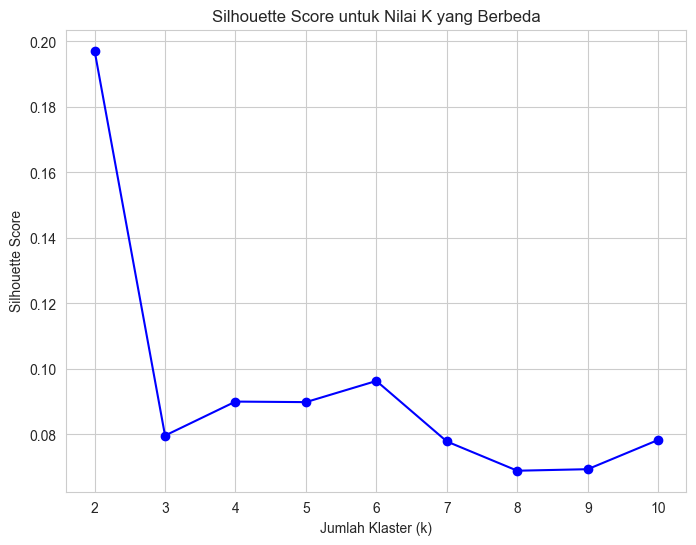

In [23]:
# Evaluasi dengan Silhouette Score untuk konfirmasi
# Menghitung Silhouette Score untuk berbagai nilai k
silhouette_scores = []
k_range = range(2, 11) 

from sklearn.utils import resample
X_sample = resample(X_scaled, n_samples=int(0.1*len(X_scaled)), random_state=42)

# Menghitung Silhouette Score dengan sampel dataset, karerna keterbatasan sumber daya komputer
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_sample)
    silhouette_avg = silhouette_score(X_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Untuk n_clusters = {k}, Silhouette Score: {silhouette_avg:.3f}")

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='b')
plt.title('Silhouette Score untuk Nilai K yang Berbeda')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Melalui silhouette score, diketahui bahwa jumlah cluster optimal adalah 2. Oleh karena itu, akan dilakukan perhitungan ulang dengan jumlah cluster = 2.

In [24]:
# Menentukan jumlah cluster final berdasarkan Elbow Method dan Silhouette Score
optimal_silhouette_score = k_range[np.argmax(silhouette_scores)] 
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_silhouette_score}")

optimal_k = optimal_silhouette_score  # Gunakan hasil silhouette score
print(f"Menggunakan jumlah cluster optimal: {optimal_k}")

# Membangun model final KMeans dengan jumlah cluster optimal
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(X_scaled)

# Menambahkan hasil klaster ke dalam dataset
df['Cluster'] = final_kmeans.labels_

Jumlah cluster optimal berdasarkan Silhouette Score: 2
Menggunakan jumlah cluster optimal: 2


## **Visualisasi Hasil Clustering Ulang**

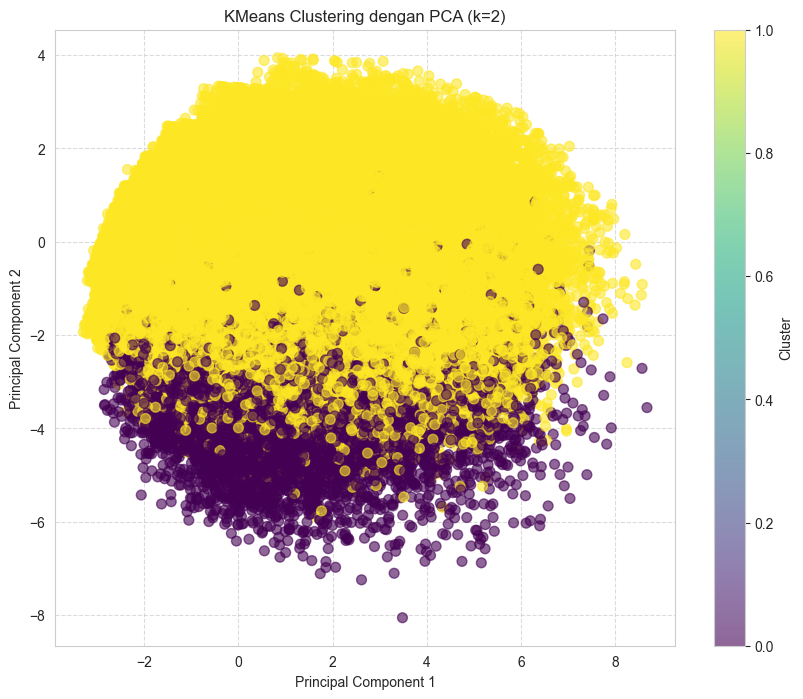

In [25]:
# Terapkan PCA untuk mereduksi dimensi data ke 2 komponen utama untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi 2D hasil clustering
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], 
                     cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.title(f'KMeans Clustering dengan PCA (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

 Visualisasi PCA 2D memberikan representasi visual dari distribusi cluster dalam ruang dimensi yang lebih rendah. Dari visualisasi ini, kita dapat melihat apakah ada
 tumpang tindih yang signifikan antar cluster atau apakah cluster terdefinisi dengan baik.

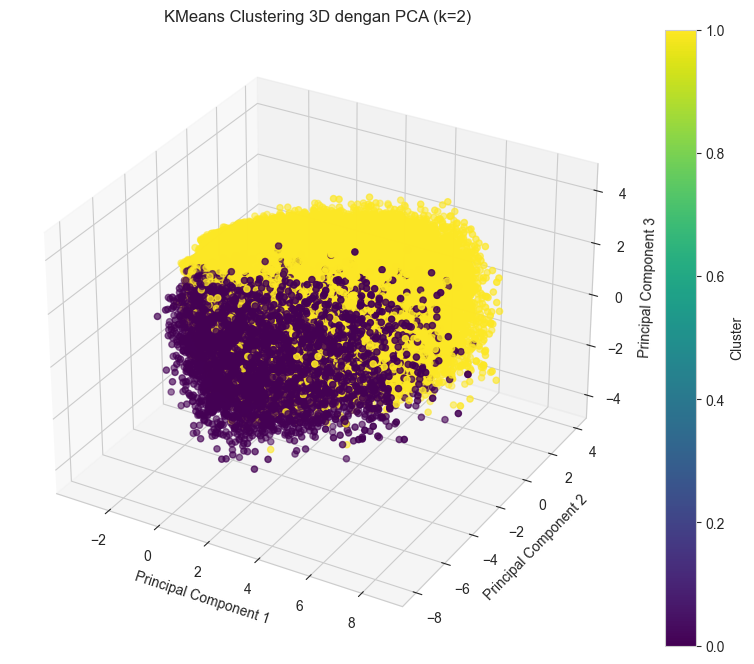

In [ ]:
# Visualisasi 3D hasil clustering jika diinginkan
# Terapkan PCA untuk mereduksi dimensi data ke 3 komponen utama
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Visualisasi 3D hasil klastering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ambil komponen PCA untuk sumbu X, Y, Z
x = X_pca_3d[:, 0]  # Komponen 1
y = X_pca_3d[:, 1]  # Komponen 2
z = X_pca_3d[:, 2]  # Komponen 3

# Plot titik berdasarkan klaster yang dihasilkan
scatter = ax.scatter(x, y, z, c=df['Cluster'], cmap='viridis')

# Labeling
ax.set_title(f'KMeans Clustering 3D dengan PCA (k={optimal_k})')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Tambahkan colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')

plt.show()

 Visualisasi 3D dengan PCA memberikan perspektif tambahan tentang struktur cluster yang mungkin tidak terlihat
 dalam visualisasi 2D.

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

#### Menampilkan distribusi fitur numerik dengan boxplot

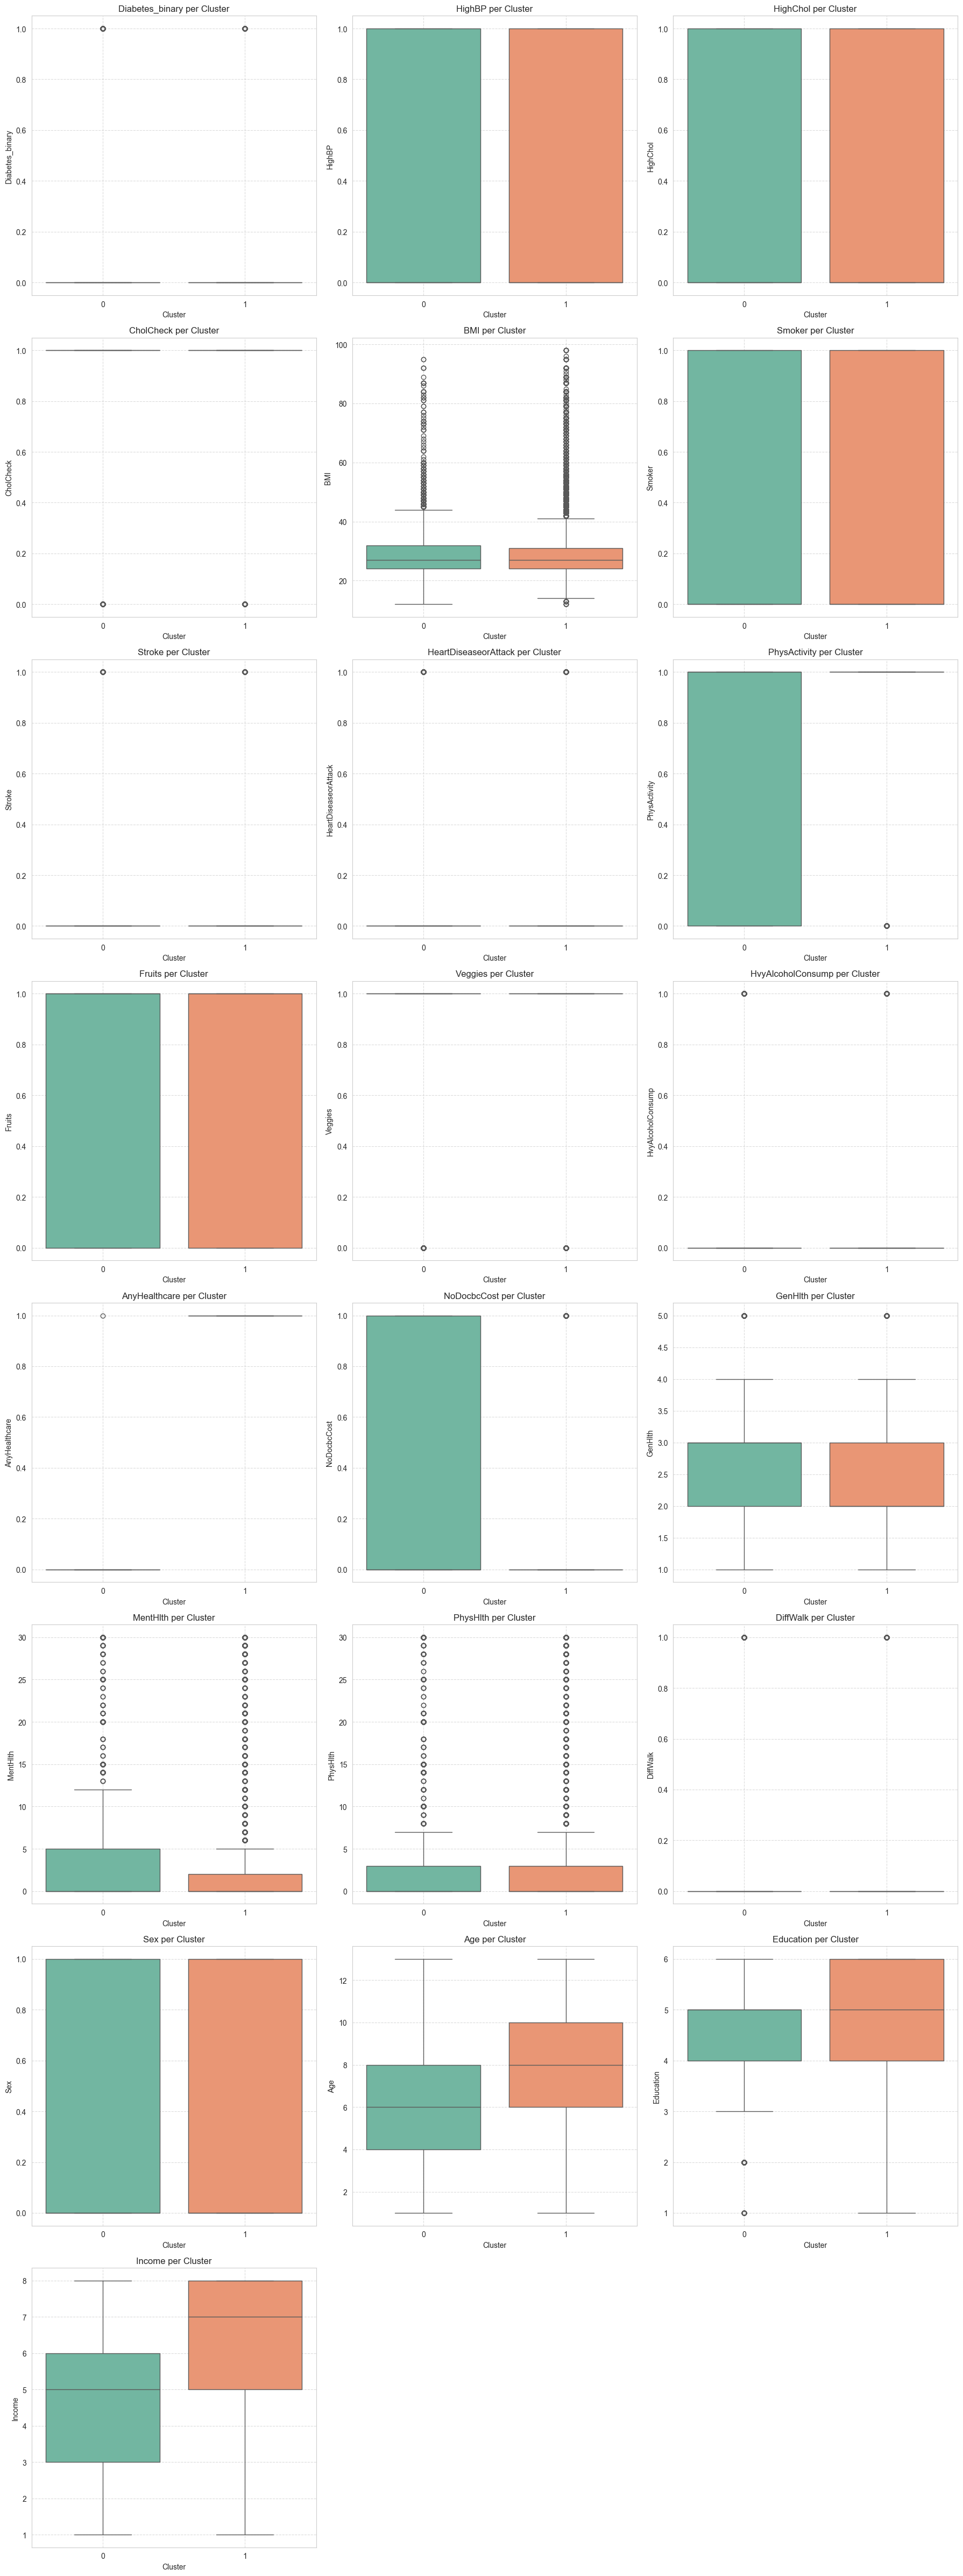

In [28]:
# Seleksi fitur numerik asli 
df_numerik = df.select_dtypes(include=['float64', 'int64']).drop('Cluster', axis=1, errors='ignore')

# Menentukan jumlah subplot berdasarkan jumlah fitur numerik
n_features = df_numerik.shape[1]
n_rows = (n_features // 3) + (1 if n_features % 3 > 0 else 0)  # Mengatur jumlah baris subplot

# Membuat subplot untuk boxplot setiap fitur
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))

# Merapikan agar setiap fitur tampil dalam boxplot-nya
axes = axes.flatten()

# Loop untuk setiap fitur numerik dan membuat boxplot untuk masing-masing klaster
for i, feature in enumerate(df_numerik.columns):
    if i < len(axes):  # Pastikan tidak melebihi jumlah subplot yang tersedia
        sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{feature} per Cluster')
        axes[i].grid(True, linestyle='--', alpha=0.7)
    
# Menyembunyikan subplot kosong yang tersisa
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

# Menyesuaikan layout agar tidak ada yang tertimpa
plt.tight_layout()
plt.show()

#### Menghitung statistik deskriptif untuk setiap cluster

Karakteristik rata-rata untuk setiap cluster:


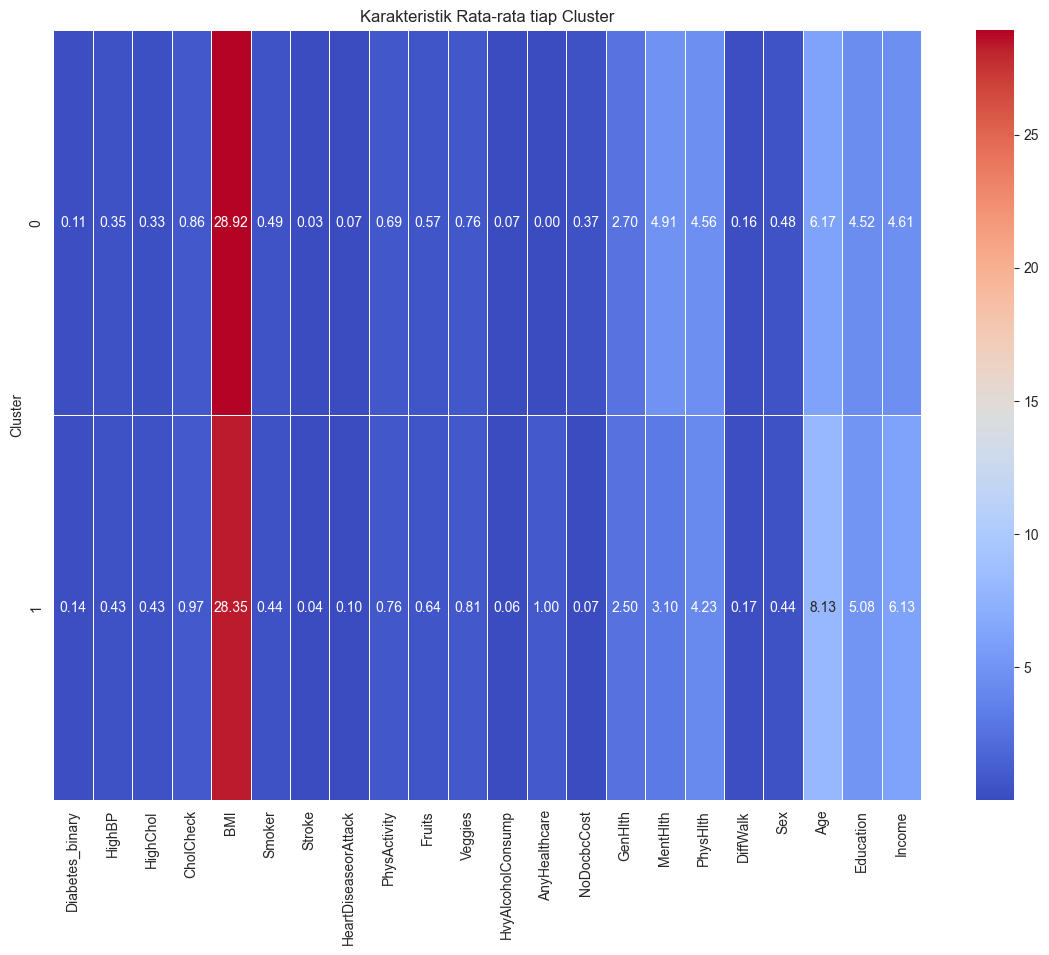

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
cluster_stats = df.groupby('Cluster')[numeric_columns].mean()

# Visualisasi heatmap karakteristik cluster
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_stats, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Karakteristik Rata-rata tiap Cluster')
plt.show()

#### Distribusi status diabetes per cluster

<Figure size 1200x600 with 0 Axes>

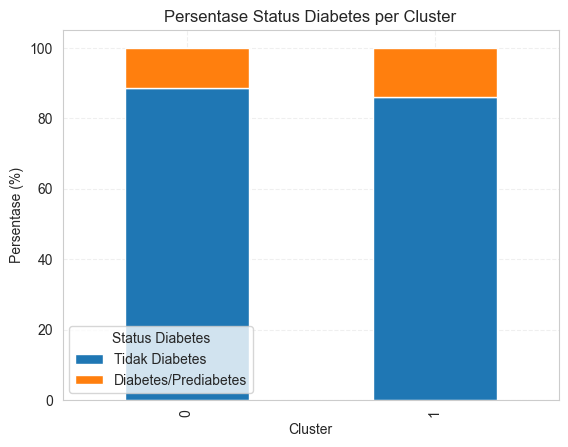

In [ ]:
plt.figure(figsize=(12, 6))
diabetes_by_cluster = pd.crosstab(df['Cluster'], df['Diabetes_binary'], normalize='index') * 100
diabetes_by_cluster.plot(kind='bar', stacked=True)
plt.title('Persentase Status Diabetes per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Persentase (%)')
plt.legend(title='Status Diabetes', labels=['Tidak Diabetes', 'Diabetes/Prediabetes'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Pada tahapan ini, diketahui bahwa hasil clustering dengan k = 2 tidak memberikan perbedaan makna yang signifikan antar cluster, sehingga dapat disimpulkan bahwa hasil clustering dengan k = 2 kurang optimal.


Hal ini disebabkan karena Elbow Method mencari titik di mana penurunan inertia mulai melambat, yakni di mana menambah klaster setelah titik itu tidak banyak mengurangi error dalam segmentasi. Sedangkan Silhouette Score mengukur seberapa jauh titik-titik dalam satu klaster dari titik-titik di klaster lain, yakni apabila skor lebih tinggi berarti klaster lebih terpisah dengan jelas.
\
\
Apabila jarak titik-titik data dan jarak antar klaster memang kecil, maka tentu silhouette score semakin kecil. Namun jarak antar klaster belum tentu dapat mengelompokkan seluruh data secara logis. Oleh karena itu, pada pengelompokan ini, diperoleh nilai k = 3 sebagai nilai paling optimal.